### [데이터 시각화 - 시도별 전출입 인구 데이터]
- 엑셀파일 => DataFrame
- 도시 간 인구 이동에 대한 분석 및 시각화


[1] 모듈 로딩 및 데이터 준비

In [73]:
## 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [74]:
## 판다스 출력 설정
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None

## 데이터 준비
DATA_FILE = '../Data/시도별 전출입 인구수.xlsx'

## EXCEL => DataFrame: openpyxl 패키지 필요
dataDF = pd.read_excel(DATA_FILE)


In [75]:
## 데이터 확인
display(dataDF.head())
dataDF.info()

## 기본적인 전처리 -------------------------------------------------------------
# -> 0번 행 삭제
# -> 전출지별 컬럼의 결측치 => 이전 행의 값으로 채우기
# -> 1970 컬럼 ~ 2017 컬럼 데이터 타입 object => int
# -> 전출지별, 전입지별 => 행 인덱스 사용 가능
# -> 결측치 컬럼 존재 => 1984, 1985, 1986년 컬럼 컬럼 3개
# -> 이상문자 '-' 거의 모든 컬럼에 존재
## ---------------------------------------------------------------------------

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,8258573,8194516,8616474,9795811,9043238,8679097,8660428,9308750,9969020,9316219,9459209,8980841,9031576,8807058,8791714,9073069,8854973,8819909,8156318,9435347,9009441,9289949,9584461,9516605,8567795,8795397,9342074,9070102,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,2767816,2859860,2997854,3434184,3052558,2784387,2683013,2853398,3388387,3049117,2726492,2437238,2395814,2259333,2240086,2165332,2159555,2074884,1802931,2337989,2219407,2295784,2318051,2242723,1926235,1990749,2173907,2078045,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,904252,852671,932367,919150,872967,821207,831658,918310,892506,790991,761684,741748,771852,708358,668188,676037,679854,641886,602418,660060,595975,604650,600936,625355,539108,552771,559915,529343,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,-,-,-,514009,553068,607848,552902,539361,533854,590786,579187,539730,526547,525249,558826,524585,545677,534013,507085,485263,462722,496811,477595,448898,466894,487515,418278,440350,428417,399853,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

[2] 전처리 <hr>

In [76]:
## [2-1] 불필요 데이터 제거
# -> 0번 ~ 19행 삭제
# -> 전출지별 컬럼의 결측치 => 이전행의 값으로 채우기
dataDF2 = dataDF.copy()

dataDF2.drop(index=[0], inplace=True)

In [77]:
dataDF2.iloc[18:]

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,2602912,2711478,2865994,3292353,2919812,2754023,2688836,2768999,3199831,2939473,2817484,2474117,2500698,2441965,2476583,2487230,2370792,2253203,1936944,2419111,2266346,2409733,2424472,2311691,1973439,2041756,2210458,2130928,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
20,NaN,서울특별시,1232619,1158556,985945,1345508,1511726,2401970,2041724,2212213,2518286,1883742,1985766,2090599,2200559,2510626,2208384,2007557,1934992,2015454,2431698,2186860,1972421,1764051,1764955,1648211,1666106,1603840,1571154,1485450,1256643,1668474,1582429,1658076,1672647,1609693,1345348,1397713,1521108,1448604,1426213,1286855,1199708,1215122,1069300,1053008,1098023,1129529,1061915,1018807
21,NaN,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,29202,30238,30035,31141,28498,27318,26235,26649,25188,22574,22005,20097,19344,18047,17411,17424,18460,17087,16839,17733,15968,16128,16732,16368,15559,15915,17079,17182,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,NaN,대구광역시,-,-,-,-,-,-,-,-,-,-,-,14813,14702,16744,14033,13861,14210,14515,13470,13666,12219,11641,11397,11573,11106,11352,11418,10648,10383,11031,9986,9363,9077,10094,9121,9447,9792,10275,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,NaN,인천광역시,-,-,-,-,-,-,-,-,-,-,-,54879,45878,57958,66715,67890,58591,58728,68068,73338,103533,80615,72097,67712,64485,62695,58631,60814,53946,54143,52829,52865,55500,44987,41567,46312,47467,51301,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,363,354,566,475,471,622,656,634,621,505,502,503,520,547,593,517,532,562,593,648,615,781,743,701,622,788,628,633,758,722,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,2722,2178,2790,2926,2683,3284,3068,2883,2151,1955,1736,1512,1536,1474,1565,1801,1415,1413,1487,1439,1492,1637,1564,1304,1293,1299,1226,1234,1217,1316,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,1009,818,1041,702,735,711,719,616,725,832,572,599,662,683,692,712,675,718,698,781,730,886,794,815,793,757,746,828,828,838,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,1331,1290,2312,1340,1744,1937,2093,1585,1548,1622,1623,1512,1368,1385,1470,1569,1609,1547,1760,1293,1185,1466,1360,1326,1587,1495,1533,1503,1543,1614,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [78]:
# -> 전출지별 컬럼의 결측치 => 이전행의 값으로 채우기
dataDF2.isna().sum()

# dataDF2['전출지별'].fillna(method='ffill')
dataDF2['전출지별'] = dataDF2['전출지별'].ffill()

dataDF2.isna().sum()

전출지별    0
전입지별    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    3
1985    3
1986    3
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64

In [79]:
# -> 결측치 컬럼 존재 => 1984, 1985, 1986년 컬럼 컬럼 3개: 빈칸 => 0
pd.set_option('future.no_silent_downcasting', True)     # 큰 거에서 작은 거로

dataDF2 = dataDF2.fillna(value=0)

# -> 이상문자 '-' 거의 모든 컬럼에 존재: 없다는 의미로 사용       => 0
dataDF2 = dataDF2.replace('-', 0)

In [80]:
## 기본 처리 후 체크
print(dataDF2.isna().sum())
print('------------')
print(dataDF2[dataDF2 == '-'].sum())

전출지별    0
전입지별    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64
------------
전출지별    0
전입지별    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015

In [81]:
## [2-2] 자료형 변환
dataDF2.dtypes

전출지별    object
전입지별    object
1970    object
1971    object
1972    object
1973    object
1974    object
1975    object
1976    object
1977    object
1978    object
1979    object
1980    object
1981    object
1982    object
1983    object
1984    object
1985    object
1986    object
1987    object
1988    object
1989    object
1990    object
1991    object
1992    object
1993    object
1994    object
1995    object
1996    object
1997    object
1998    object
1999    object
2000    object
2001    object
2002    object
2003    object
2004    object
2005    object
2006    object
2007    object
2008    object
2009    object
2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
dtype: object

[3] 서울 => 타지역으로 이주한 인구 변화 시각화 <hr>

In [82]:
seoulDF = dataDF2[dataDF2['전출지별'] == '서울특별시']

## 전출지별 컬럼 제거 + 전입지별로 행 인덱스 설정
seoulDF = seoulDF.drop(columns='전출지별').set_index('전입지별')
# 

## 전국, 서울특별시 제외한 나머지 지역만
seoulDF.drop(index=seoulDF.index[:2], inplace=True)

display(seoulDF)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,29202,30238,30035,31141,28498,27318,26235,26649,25188,22574,22005,20097,19344,18047,17411,17424,18460,17087,16839,17733,15968,16128,16732,16368,15559,15915,17079,17182,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,0,0,0,0,0,0,0,0,0,0,0,14813,14702,16744,14033,13861,14210,14515,13470,13666,12219,11641,11397,11573,11106,11352,11418,10648,10383,11031,9986,9363,9077,10094,9121,9447,9792,10275,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,0,0,0,0,0,0,0,0,0,0,0,54879,45878,57958,66715,67890,58591,58728,68068,73338,103533,80615,72097,67712,64485,62695,58631,60814,53946,54143,52829,52865,55500,44987,41567,46312,47467,51301,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11478,12324,14134,16784,16416,15345,14824,13419,13368,13758,13401,13518,13351,13429,11579,11266,10947,10525,10268,10447,11481,11624,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16281,19028,19496,17689,20291,18790,18989,18310,16685,19470,17463,16154,15163,14727,15557,14005,14366,14871,14277,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4545,4413,4563,4105,4266,4085,4456,4252,4227,4656,4801,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,297539,252073,320174,400875,352238,390265,412535,405220,415174,412933,473889,384714,428344,502584,542204,599411,520566,495454,407050,471841,435573,499575,516765,457656,400206,414621,449632,431637,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,32858,32116,31013,31308,30470,29911,28489,28699,26691,26394,26591,25208,25215,23244,21384,24987,25221,25178,25840,25741,22832,22941,21582,21696,22071,20483,21969,22177,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


[4] 대구 => 타지역으로 이주한 인구 변화 시각화 <hr>

In [89]:
daeguDF = dataDF2[dataDF2['전출지별'] == '대구광역시']

## 전출지별 컬럼 제거 + 전입지별로 행 인덱스 설정
daeguDF = daeguDF.drop(columns='전출지별').set_index('전입지별')

## 전국, 서울특별시 제외한 나머지 지역만
daeguDF.drop(index=daeguDF.index[[0, 3]], inplace=True)

display(daeguDF)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시,0,0,0,0,0,0,0,0,0,0,0,19760,23725,32205,28897,25736,21724,20130,22080,21201,19521,17638,16451,15442,14193,14137,14456,14410,13888,16322,16970,16841,16781,15963,15093,15386,15902,15849,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,0,0,0,0,0,0,0,0,0,0,0,10590,10732,10512,10804,10696,10114,10496,10019,8789,8848,7788,7119,6410,5848,6241,6584,6434,6290,6566,5844,6086,5687,6177,5567,5784,5232,5374,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
인천광역시,0,0,0,0,0,0,0,0,0,0,0,1440,1640,1921,1927,2036,1922,2074,1927,2272,2438,2099,2087,2111,1957,1963,2093,2033,1828,2199,2209,2575,2528,2392,2252,2257,2250,2442,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,517,529,629,704,620,511,502,448,357,493,529,464,523,562,531,622,564,646,623,670,668,602,563,624,527,577,711,622,902,629,547,515
대전광역시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,2169,2119,2044,2330,2253,2502,2751,2418,2314,2528,2378,2561,2672,2471,2397,2528,2483,2221,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4074,3339,3476,3465,3835,3574,4054,4101,4211,4129,4023,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,261,233,526,879,642,827
경기도,0,0,0,0,0,0,0,0,0,0,0,4885,6273,8204,7742,7622,8341,9169,9005,9368,10022,9109,8964,8952,8552,10032,10261,10655,10459,11978,13071,13948,14262,14745,14690,15473,15510,14740,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354
강원도,0,0,0,0,0,0,0,0,0,0,0,3333,3211,3099,2883,2961,2928,2360,2135,2257,2295,2127,2157,2104,1953,2030,2024,2171,2189,2275,1889,1980,1927,2099,2084,1941,1970,1937,1996,1942,2039,1843,1807,1820,1884,1884,1748,1657


In [92]:
def getlocalDF(local_name, local_idx):
    localDF = dataDF2[dataDF2['전출지별'] == local_name]

    ## 전출지별 컬럼 제거 + 전입지별로 행 인덱스 설정
    localDF = localDF.drop(columns='전출지별').set_index('전입지별')

    ## 전국, 해당 지역 제외한 나머지 지역만
    localDF.drop(index=localDF.index[[0, local_idx]], inplace=True)

    return localDF

[5] 시각화 <hr>

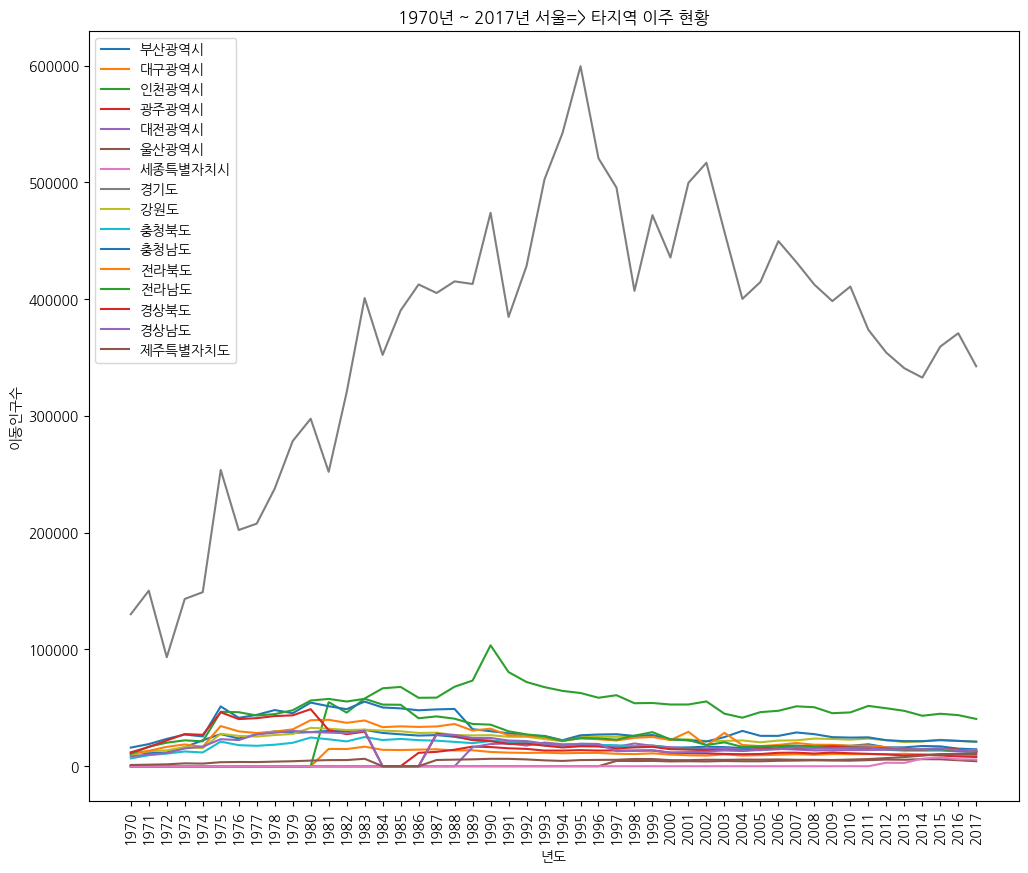

In [95]:
## 그래프 표시 창 크기 설정
plt.figure(figsize=(12, 10))                                # 그래프 출력 크기 (가로, 세로)

## 서울에서 타지역으로 이주한 그래프
for label_idx in seoulDF.index:
    plt.plot(seoulDF.loc[label_idx], label=label_idx)       # 각 행(row) 을 하나의 선 그래프(line) 로 그리는 코드

## 그래프 설정
plt.legend()
plt.title("1970년 ~ 2017년 서울=> 타지역 이주 현황")
plt.xlabel("년도")
plt.ylabel("이동인구수")
plt.xticks(rotation=90)     ## x축 눈금 라벨을 가로 => 90도 회전
plt.show()

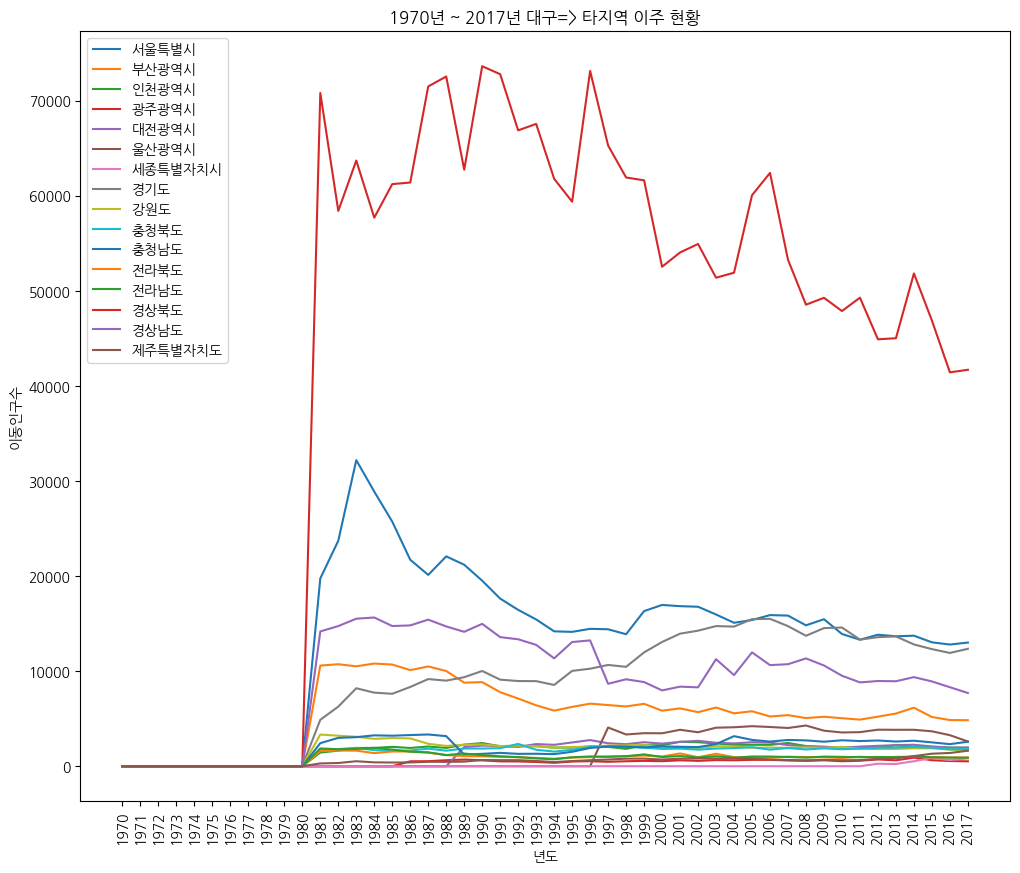

In [96]:
## 그래프 표시 창 크기 설정
plt.figure(figsize=(12, 10))                                # 그래프 출력 크기 (가로, 세로)

## 대구에서 타지역으로 이주한 그래프
for label_idx in daeguDF.index:
    plt.plot(daeguDF.loc[label_idx], label=label_idx)       # 각 행(row) 을 하나의 선 그래프(line) 로 그리는 코드

## 그래프 설정
plt.legend()
plt.title("1970년 ~ 2017년 대구=> 타지역 이주 현황")
plt.xlabel("년도")
plt.ylabel("이동인구수")
plt.xticks(rotation=90)     ## x축 눈금 라벨을 가로 => 90도 회전
plt.show()